In [1]:
import cirq
import numpy as np
import cirq_superstaq as css

In [2]:
try:
    import qiskit

    install_qiskit = not ("0.20" < qiskit.__version__ < "0.21")
except ImportError:
    install_qiskit = True

if install_qiskit:
    print("installing qiskit...")
    !pip install -q qiskit-terra~=0.20.2
    print("installed qiskit.")

In [3]:
service = css.Service()

In [4]:
qubits = cirq.LineQubit.range(2)

In [5]:
circuit = cirq.Circuit(css.AceCRPlusMinus(qubits[0], qubits[1]))

In [6]:
circuit

0: ───AceCR+-(Z side)───
      │
1: ───AceCR+-(X side)───

In [7]:
out = service.ibmq_compile(circuit, target="ibmq_jakarta_qpu")

In [8]:
out.circuit

0: ───AceCR+-(Z side)───
      │
1: ───AceCR+-(X side)───

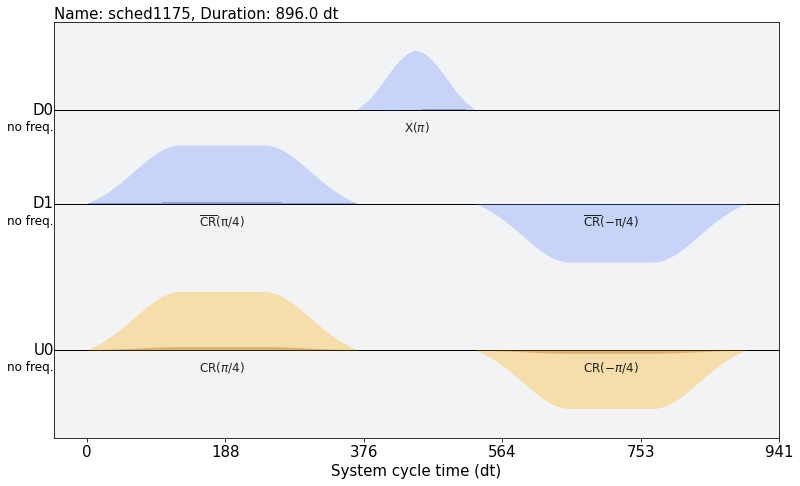

In [9]:
out.pulse_sequence.draw()

In [10]:
circuit = cirq.Circuit(css.AceCR("-+", np.pi / 2)(qubits[0], qubits[1]))
out = service.ibmq_compile(circuit, target="ibmq_jakarta_qpu")

In [11]:
out.circuit

0: ───AceCR-+(Z side)─────────────
      │
1: ───AceCR-+(X side)|Rx(0.5π)|───

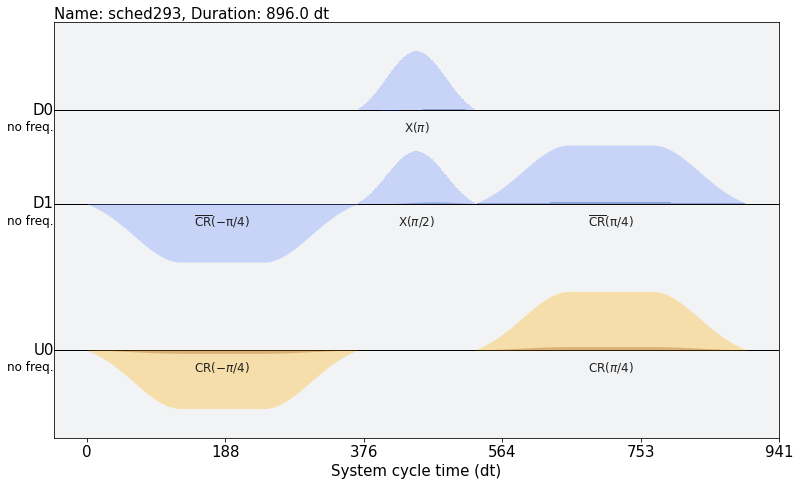

In [12]:
out.pulse_sequence.draw()